In [42]:
import csv
import matplotlib.pyplot as plt

In [43]:
# Function to read the CSV file and convert it into a dictionary
def csv_to_dict(file_path):
    data = []
    with open(file_path, mode='r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            data.append(dict(row))
    return data

In [44]:
file_path = r'C:\SZvsWorkspace\PersonalProjects\Crime_Analysis\LEOKA_1995_2023\LEOKA_ASSAULT_TIME_WEAPON_INJURY_1995_2022.csv'
crime_data = csv_to_dict(file_path)
print(f'Length of data: {len(crime_data)}')
for key in crime_data[0].keys():
    print(key, crime_data[0][key])
    

Length of data: 324156
DATA_YEAR 1995
PUB_AGENCY_NAME Abbeville
PUB_AGENCY_UNIT 
STATE_ABBR GA
DIVISION_NAME South Atlantic
REGION_NAME South
AGENCY_TYPE_NAME City
POPULATION_GROUP_DESC Cities under 2,500
COUNTY_NAME WILCOX
TIME_0001_0200_CNT 0
TIME_0201_0400_CNT 0
TIME_0401_0600_CNT 0
TIME_0601_0800_CNT 0
TIME_0801_1000_CNT 0
TIME_1001_1200_CNT 0
TIME_1201_1400_CNT 0
TIME_1401_1600_CNT 0
TIME_1601_1800_CNT 0
TIME_1801_2000_CNT 0
TIME_2001_2200_CNT 0
TIME_2201_0000_CNT 0
FIREARM_INJURY_CNT 0
FIREARM_NO_INJURY_CNT 0
KNIFE_INJURY_CNT 0
KNIFE_NO_INJURY_CNT 0
HANDS_FISTS_FEET_INJURY_CNT 0
HANDS_FISTS_FEET_NO_INJURY_CNT 0
OTHER_INJURY_CNT 0
OTHER_NO_INJURY_CNT 0
LEOKA_FELONY_KILLED 0
LEOKA_ACCIDENT_KILLED 0


In [45]:
knife_inj = {}
knife_non = {}

year_list = list(range(1995,2024))
for year in year_list:
    knife_inj[year] = []
    knife_non[year] = []
print(year_list)

for item in crime_data:
    if item['KNIFE_INJURY_CNT'] != '0' and item['KNIFE_NO_INJURY_CNT'] != '0':
        pass
    elif item['KNIFE_INJURY_CNT'] != '0':
        knife_inj[int(item['DATA_YEAR'])].append(item)
    elif item['KNIFE_NO_INJURY_CNT'] != '0':
        knife_non[int(item['DATA_YEAR'])].append(item)

knife_crime = [knife_inj, knife_non]

[1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [46]:
print(len(year_list))

29


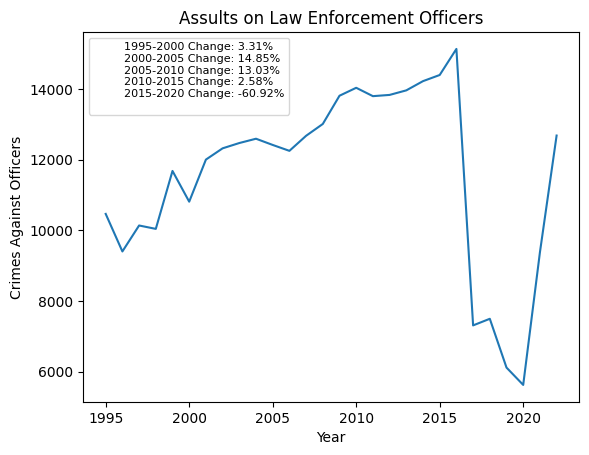

In [47]:
crimes_per_year = {}
knife_crimes_per_year = {}
for i in range(28):
    crimes_per_year[1995 + i] = 0
    knife_crimes_per_year[1995 + i] = 0

for item in crime_data:
    crimes_per_year[int(item['DATA_YEAR'])] += 1
    if int(item['KNIFE_INJURY_CNT']) != 0 or int(item['KNIFE_NO_INJURY_CNT']) :
        knife_crimes_per_year[int(item['DATA_YEAR'])] += 1

crime_amount = []
knife_crime_amount = []
for key in crimes_per_year.keys():
    crime_amount.append(crimes_per_year[key])
    knife_crime_amount.append(knife_crimes_per_year[key])

plt.title('Assults on Law Enforcement Officers')
plt.xlabel('Year')
plt.ylabel('Crimes Against Officers')
plt.plot(list(crimes_per_year.keys()), crime_amount)

row_list = ''
for i in range(1995, 2020, 5):
    row_list = row_list + (f'{i}-{i+5} Change: {round((crimes_per_year[i+5]/crimes_per_year[i] - 1)*100, 2)}%\n')
change_info = row_list

plt.plot([], [], ' ', label=change_info)
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [48]:
print(knife_crime_amount)
print(crime_amount)

[523, 388, 426, 501, 501, 485, 540, 525, 507, 505, 484, 528, 511, 442, 434, 477, 467, 471, 475, 472, 474, 519, 459, 443, 414, 463, 437, 576]
[10468, 9405, 10140, 10044, 11684, 10814, 12005, 12324, 12474, 12596, 12420, 12253, 12679, 13014, 13813, 14038, 13801, 13836, 13965, 14226, 14400, 15138, 7312, 7499, 6118, 5627, 9377, 12686]


In [49]:
knife_percent_crime = []
for i in range(len(knife_crime_amount)):
    knife_percent_crime.append(knife_crime_amount[i] / crime_amount[i] * 100)

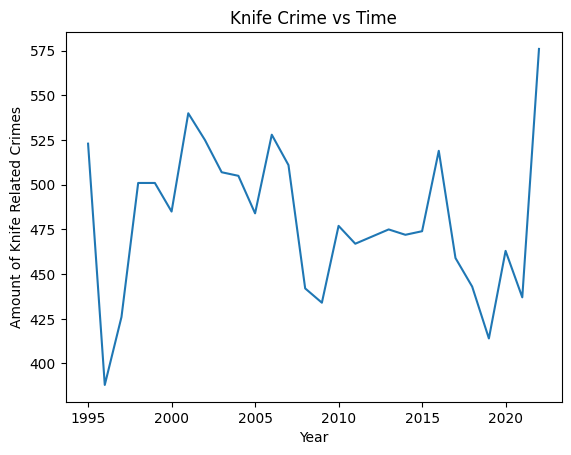

In [50]:
plt.xlabel('Year')
plt.ylabel('Amount of Knife Related Crimes')
plt.title('Knife Crime vs Time')
plt.plot(list(knife_crimes_per_year.keys()), knife_crime_amount)

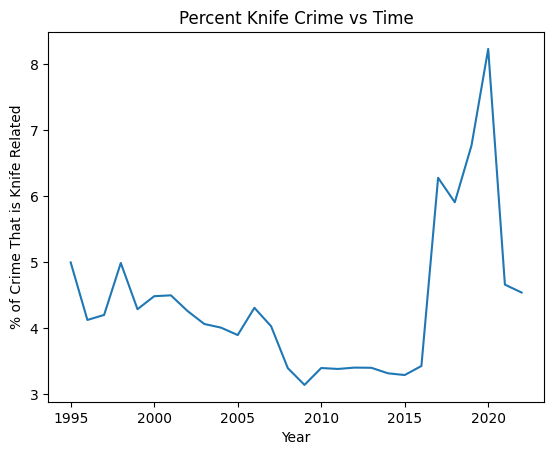

In [51]:
plt.xlabel('Year')
plt.ylabel(r"% of Crime That is Knife Related")
plt.title('Percent Knife Crime vs Time')
plt.plot(list(knife_crimes_per_year.keys()), knife_percent_crime)